# Market Regime Classification

[*********************100%***********************]  1 of 1 completed


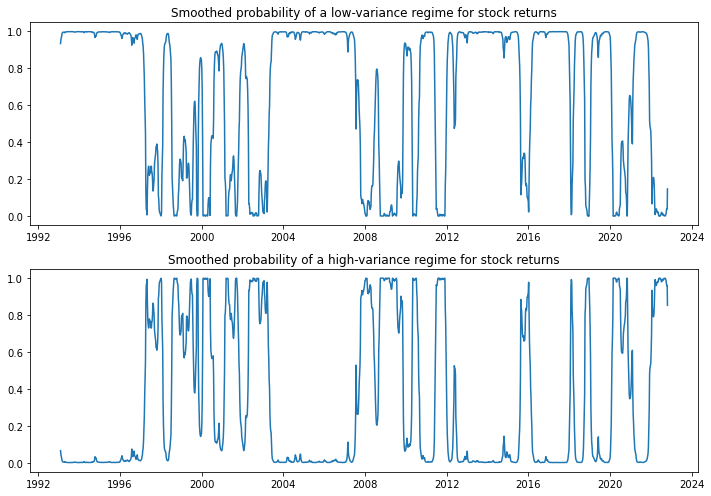

In [3]:
spy = yf.download("SPY",interval='1wk')
spy['return'] = np.log(spy['Adj Close']) - np.log(spy['Adj Close'].shift())

model = sm.tsa.MarkovRegression(
    spy['return'].dropna(), 2, switching_variance=True, trend='n'
)
result = model.fit()

fig, axes = plt.subplots(2, figsize=(10, 7))

ax = axes[0]
ax.plot(result.smoothed_marginal_probabilities[0])
ax.set(title="Smoothed probability of a low-variance regime for stock returns")

ax = axes[1]
ax.plot(result.smoothed_marginal_probabilities[1])
ax.set(title="Smoothed probability of a high-variance regime for stock returns")

fig.tight_layout()

# Low Volatility: train 2004-06-29->2006-06-29, test 2015-12-16->2018-12-19

## OU Process

### Training

In [4]:
# Get historical data from Yahoo API
def get_historical_data(tickers, start, end):

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- XLC: Data doesn't exist for startDate = 1088481600, endDate = 1151553600
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1088481600, endDate = 1151553600
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]

,SPY,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLK,XLU
Date,,,,,,,,,,
2004-06-29,4.379671,3.215527,2.666494,2.949771,2.762862,3.108306,2.990257,2.875572,2.763335,2.522161
2004-06-30,4.385012,3.217425,2.672576,2.957425,2.767069,3.111912,2.996558,2.882693,2.770121,2.526379
2004-07-01,4.371031,3.211400,2.662565,2.958695,2.760047,3.097741,2.981440,2.864606,2.751593,2.514525
2004-07-02,4.370500,3.205979,2.662565,2.962495,2.762862,3.097077,2.972903,2.858504,2.740707,2.524694
2004-07-06,4.361691,3.199562,2.663003,2.965020,2.755809,3.089743,2.970756,2.850823,2.719082,2.523006
...,...,...,...,...,...,...,...,...,...,...
2006-06-22,4.505847,3.273772,2.744105,3.489709,2.921075,3.117472,3.172836,3.062446,2.766689,2.877572
2006-06-23,4.505685,3.272860,2.740749,3.511679,2.914455,3.118473,3.175547,3.070884,2.763698,2.879152
2006-06-26,4.510096,3.278017,2.746196,3.522671,2.923272,3.114797,3.178251,3.073789,2.765693,2.883250


In [5]:
low_vol_train_returns = (low_vol_train_prices - low_vol_train_prices.shift()).dropna()
low_vol_train_returns

,SPY,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLK,XLU
Date,,,,,,,,,,
2004-06-30,0.005341,0.001898,0.006082,0.007653,0.004208,0.003606,0.006301,0.007120,0.006786,0.004218
2004-07-01,-0.013980,-0.006025,-0.010011,0.001270,-0.007023,-0.014171,-0.015118,-0.018086,-0.018528,-0.011854
2004-07-02,-0.000531,-0.005422,0.000000,0.003800,0.002815,-0.000664,-0.008537,-0.006103,-0.010886,0.010169
2004-07-06,-0.008809,-0.006416,0.000438,0.002525,-0.007052,-0.007334,-0.002146,-0.007680,-0.021625,-0.001688
2004-07-07,0.002945,-0.002901,0.000874,0.005972,-0.002126,-0.002345,0.001789,0.011499,0.006587,0.002109
...,...,...,...,...,...,...,...,...,...,...
2006-06-22,-0.004409,-0.007869,-0.001674,0.004222,-0.003763,-0.005660,-0.006015,-0.005202,-0.011875,-0.003474
2006-06-23,-0.000161,-0.000912,-0.003355,0.021970,-0.006620,0.001001,0.002711,0.008439,-0.002991,0.001580
2006-06-26,0.004411,0.005157,0.005447,0.010992,0.008816,-0.003676,0.002704,0.002905,0.001995,0.004098


<AxesSubplot:>

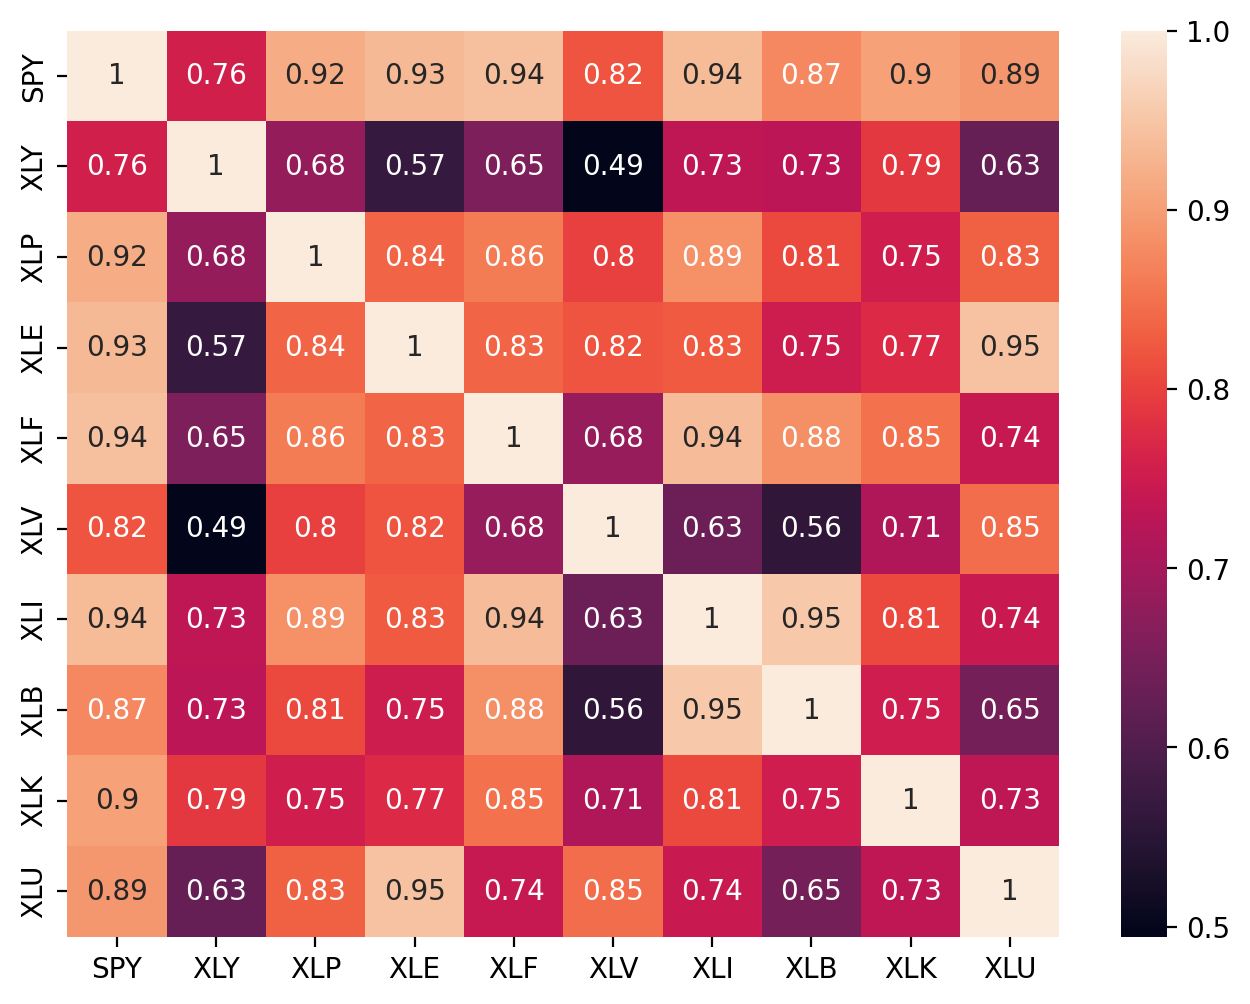

In [6]:
corr_matrix = low_vol_train_prices.corr()
plt.figure(figsize=(8, 6), dpi=200)
sn.heatmap(corr_matrix, annot = True)

In [7]:
low_vol_trade_tickers = low_vol_train_prices.columns.tolist()
low_vol_trade_tickers.remove('SPY')

In [8]:
def adf_test(residual):
    return ts.adfuller(residual)[1]

In [9]:
kf_initial_beta = {}

def kalman_regression(X, y, initial_beta, delta=1e-2):
    observation_matrix = np.expand_dims(np.vstack([[X], [np.ones(len(X))]]).T, axis=1)
    
    trans_cov = delta / (1 - delta) * np.eye(2)

    kf = KalmanFilter(n_dim_obs=1, n_dim_state=2,
                  initial_state_mean=np.array([initial_beta, 0]),
                  initial_state_covariance=np.ones((2, 2)),
                  transition_matrices=np.eye(2),
                  observation_matrices=observation_matrix,
                  observation_covariance=0.01,
                  transition_covariance=trans_cov)
    state_means, state_covs = kf.filter(y)

    slope=state_means[:,0]
    intercept=state_means[:,1]
    return slope, intercept, y - slope*X - intercept

def lr_strategy(adf_pvalue_threshold, returns, tickers):
    z_scores = pd.DataFrame(index=returns.index[59:], columns=tickers)
    betas = pd.DataFrame(index=returns.index[59:], columns=tickers)
    kf_initial_beta.clear()

    for t in returns.index[59:]:
        rolling_ret = returns.loc[:t]
        rolling_ret = rolling_ret.iloc[-60:]

        ou_parameters = pd.DataFrame(index=tickers, columns=['a', 'b', 'm', 'sigma_eq'])

        for ticker in tickers:
            X = rolling_ret["SPY"].values.reshape(-1, 1)
            y = rolling_ret[ticker].values
            lr1 = LinearRegression().fit(X,y) 
            betas.loc[t, ticker] = lr1.coef_[0]
            abnormal_returns = y - lr1.predict(X)
            if ticker not in kf_initial_beta:
                kf_initial_beta[ticker] = lr1.coef_[0]

            adf_pvalue = adf_test(abnormal_returns)
            if adf_pvalue <= adf_pvalue_threshold:
                Xk = abnormal_returns.cumsum()
                X = Xk[:-1].reshape(-1,1)
                y = Xk[1:]
                lr2 = LinearRegression().fit(X, y)
                a = lr2.intercept_
                b = lr2.coef_
                residual = y - lr2.predict(X)

                # http://cs229.stanford.edu/proj2012/ChenRenLu-MachineLearningInPairsTradingStrategies.pdf
                speed = -np.log(b)*252
                m = a/(1-b)
                sigma = np.sqrt(np.var(residual)*2*speed/(1-b**2))
                sigma_eq = sigma/(np.sqrt(2*speed))
                
                ou_parameters.loc[ticker] = [a, b, m[0], sigma_eq[0]]

        z_scores.loc[t] = -ou_parameters['m'] / ou_parameters['sigma_eq']
    
    return z_scores, betas

def kf_strategy(adf_pvalue_threshold, returns, tickers):
    z_scores = pd.DataFrame(index=returns.index[59:], columns=tickers)
    betas = pd.DataFrame(index=returns.index[59:], columns=tickers)

    for ticker in tickers:
        X = returns["SPY"].values
        y = returns[ticker].values
        beta, alpha, abnormal_returns = kalman_regression(X, y, kf_initial_beta[ticker])
        betas[ticker] = beta[59:]

        for t in range(59, len(abnormal_returns)):
            rolling_ret = abnormal_returns[:t]
            rolling_ret = rolling_ret[-60:]

            adf_pvalue = adf_test(rolling_ret)
            if adf_pvalue <= adf_pvalue_threshold:
                Xk = rolling_ret.cumsum()
                X = Xk[:-1].reshape(-1,1)
                y = Xk[1:]
                lr2 = LinearRegression().fit(X, y)
                a = lr2.intercept_
                b = lr2.coef_
                residual = y - lr2.predict(X)

                # http://cs229.stanford.edu/proj2012/ChenRenLu-MachineLearningInPairsTradingStrategies.pdf
                speed = -np.log(b)*252
                m = a/(1-b)
                sigma = np.sqrt(np.var(residual)*2*speed/(1-b**2))
                sigma_eq = sigma/(np.sqrt(2*speed))

                z_scores.loc[z_scores.index[t-59]][ticker] = -m[0] / sigma_eq[0]
    return z_scores, betas

In [10]:
def calculate_performance_metrics(ret):
    cum_ret = ret.cumsum()
    total_return = cum_ret[-1]
    sharpe = np.sqrt(252) * np.mean(ret) / np.std(ret)
    ret_drawdown = cum_ret.cummax() - cum_ret
    max_drawdown = max(ret_drawdown)
    
    return total_return, sharpe, max_drawdown

def calculate_hit_ratio(daily_positions, prices, tickers):
    signed_positions = np.sign(daily_positions)
    reverse_trade = signed_positions != signed_positions.shift().fillna(0)
    long_price = {}
    short_price = {}
    num_trades = 0
    num_hits = 0
    for t in range(len(daily_positions.index)):
        date = daily_positions.index[t]
        if t == 0:
            for ticker in tickers:
                if reverse_trade.loc[date][ticker]:
                    if signed_positions.loc[date][ticker] == 1:
                        long_price[ticker] = prices.loc[date][ticker]
                    elif signed_positions.loc[date][ticker] == -1:
                        short_price[ticker] = prices.loc[date][ticker]
        else:
            prev_date = daily_positions.index[t-1]
            for ticker in tickers:
                if reverse_trade.loc[date][ticker]:
                    if signed_positions.loc[date][ticker] == 1 and signed_positions.loc[prev_date][ticker] == 0:
                        long_price[ticker] = prices.loc[date][ticker]
                    elif signed_positions.loc[date][ticker] == 1 and signed_positions.loc[prev_date][ticker] == -1:
                        long_price[ticker] = prices.loc[date][ticker]
                        num_trades += 1
                        entry_price = short_price.pop(ticker)
                        if prices.loc[date][ticker] < entry_price:
                            num_hits += 1
                    elif signed_positions.loc[date][ticker] == -1 and signed_positions.loc[prev_date][ticker] == 0:
                        short_price[ticker] = prices.loc[date][ticker]
                    elif signed_positions.loc[date][ticker] == -1 and signed_positions.loc[prev_date][ticker] == 1:
                        short_price[ticker] = prices.loc[date][ticker]
                        num_trades += 1
                        entry_price = long_price.pop(ticker)
                        if prices.loc[date][ticker] > entry_price:
                            num_hits += 1
                    elif signed_positions.loc[prev_date][ticker] == 1:
                        num_trades += 1
                        entry_price = long_price.pop(ticker)
                        if prices.loc[date][ticker] > entry_price:
                            num_hits += 1
                    elif signed_positions.loc[prev_date][ticker] == -1:
                        num_trades += 1
                        entry_price = short_price.pop(ticker)
                        if prices.loc[date][ticker] < entry_price:
                            num_hits += 1
                    else:
                        print('error')
    hit_ratio = num_hits/num_trades
    
    return hit_ratio

In [11]:
def ou_hyper_parameter_tuning(z_scores, betas, returns, open_short, open_long, close_short, close_long):
    daily_positions = pd.DataFrame(index=z_scores.index, columns=z_scores.columns)
    for ticker in z_scores.columns:
        positions = pd.DataFrame(index=z_scores.index, columns=[ticker])
        cur_position = 0
        for t in z_scores.index:
            score = z_scores.loc[t][ticker]
            if score>open_short:
                positions.loc[t][ticker] = -1 # open short
                cur_position = -1
            elif score<open_long:
                positions.loc[t][ticker] = 1 # open long
                cur_position = 1
            elif score<close_short and cur_position==-1: 
                positions.loc[t][ticker] = 0 # close short
                cur_position = 0
            elif score>close_long and cur_position==1:
                positions.loc[t][ticker] = 0 # close long
                cur_position = 0
            elif score == math.isnan(score):
                positions.loc[t][ticker] = 0 # close current position
                cur_position = 0
            else:
                positions.loc[t][ticker] = cur_position # carry forward current position

        daily_positions[ticker] = positions
    
    weighted_positions = pd.DataFrame(index=daily_positions.index, columns=z_scores.columns)
    for t in daily_positions.index:
        positions = daily_positions.loc[t]
        positions[positions>0] /= sum(positions>0) # equal weights among long positions
        positions[positions<0] /= sum(positions<0) # equal weights among short positions
        weighted_positions.loc[t] = positions
    weighted_positions["SPY"] = -np.stack((betas*weighted_positions).sum(axis=1).values)
    
    ret = (returns * weighted_positions.shift()).sum(axis=1) / (abs(weighted_positions.shift()).sum(axis=1)/2)
    ret = ret.fillna(0)
    return calculate_performance_metrics(ret.iloc[60:]), ret.iloc[59:], weighted_positions

In [12]:
# confidence interval controls stop loss -> stationary lost
low_vol_train_lr_z_scores_95_confidence, low_vol_train_lr_betas = lr_strategy(0.05, low_vol_train_returns, low_vol_trade_tickers)
low_vol_train_lr_z_scores_90_confidence, low_vol_train_lr_betas = lr_strategy(0.1, low_vol_train_returns, low_vol_trade_tickers)

In [13]:
low_vol_train_kf_z_scores_95_confidence, low_vol_train_kf_betas = kf_strategy(0.05, low_vol_train_returns, low_vol_trade_tickers)
low_vol_train_kf_z_scores_90_confidence, low_vol_train_kf_betas = kf_strategy(0.1, low_vol_train_returns, low_vol_trade_tickers)

<AxesSubplot:xlabel='Date'>

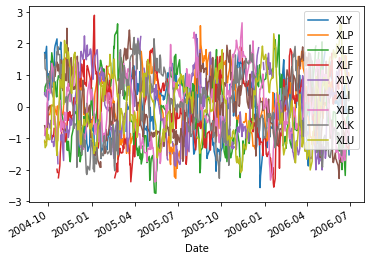

In [14]:
low_vol_train_lr_z_scores_95_confidence.plot()

<AxesSubplot:xlabel='Date'>

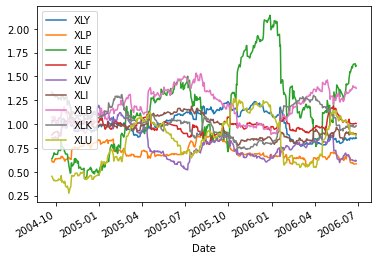

In [15]:
low_vol_train_lr_betas.plot()

<AxesSubplot:xlabel='Date'>

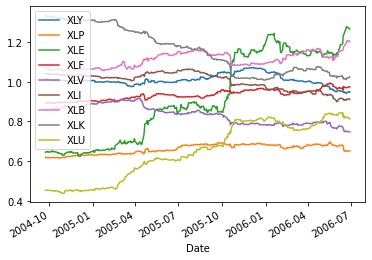

In [16]:
low_vol_train_kf_betas.plot()

In [17]:
# tested with different parameters
open_shorts, open_longs, close_shorts, close_longs = [], [], [], []

In [18]:
low_vol_train_lr_95_confidence = {}
for open_short in open_shorts:
    for open_long in open_longs:
        for close_short in close_shorts:
            for close_long in close_longs:
                low_vol_train_lr_95_confidence[(open_short, open_long, close_short, close_long)] = ou_hyper_parameter_tuning(low_vol_train_lr_z_scores_95_confidence, low_vol_train_lr_betas, low_vol_train_returns, open_short, open_long, close_short, close_long)
# using the same pattern to get:
low_vol_train_lr_90_confidence
low_vol_train_kf_95_confidence
low_vol_train_kf_90_confidence

In [6]:
# get the optimal parameters for the OU_LR strategy by looking for the max z-score under 95 condidence level

In [303]:
# calculate hit ratio
low_vol_train_lr_95_best_parameter = low_vol_train_lr_95_confidence_df.loc[low_vol_train_lr_95_confidence_df_zscore['score'].idxmax()].parameters
calculate_hit_ratio(low_vol_train_lr_95_confidence[low_vol_train_lr_95_best_parameter][2], low_vol_train_prices, low_vol_trade_tickers)

0.66

In [7]:
# get the optimal parameters for the OU_LR strategy by looking for the max z-score under 90 condidence level

In [306]:
# calculate hit ratio
low_vol_train_lr_90_best_parameter = low_vol_train_lr_90_confidence_df.loc[low_vol_train_lr_90_confidence_df_zscore['score'].idxmax()].parameters
calculate_hit_ratio(low_vol_train_lr_90_confidence[low_vol_train_lr_90_best_parameter][2], low_vol_train_prices, low_vol_trade_tickers)

0.66

In [8]:
# get the optimal parameters for the OU_LR strategy by looking for the max z-score under 95 condidence level

In [309]:
# calculate hit ratio
low_vol_train_kf_95_best_parameter = low_vol_train_kf_95_confidence_df.loc[low_vol_train_lr_95_confidence_df_zscore['score'].idxmax()].parameters
calculate_hit_ratio(low_vol_train_kf_95_confidence[low_vol_train_kf_95_best_parameter][2], low_vol_train_prices, low_vol_trade_tickers)

0.5432525951557093

In [9]:
# get the optimal parameters for the OU_LR strategy by looking for the max z-score under 95 condidence level

In [312]:
# calculate hit ratio
low_vol_train_kf_90_best_parameter = low_vol_train_kf_90_confidence_df.loc[low_vol_train_lr_90_confidence_df_zscore['score'].idxmax()].parameters
calculate_hit_ratio(low_vol_train_kf_90_confidence[low_vol_train_kf_90_best_parameter][2], low_vol_train_prices, low_vol_trade_tickers)

0.5440414507772021

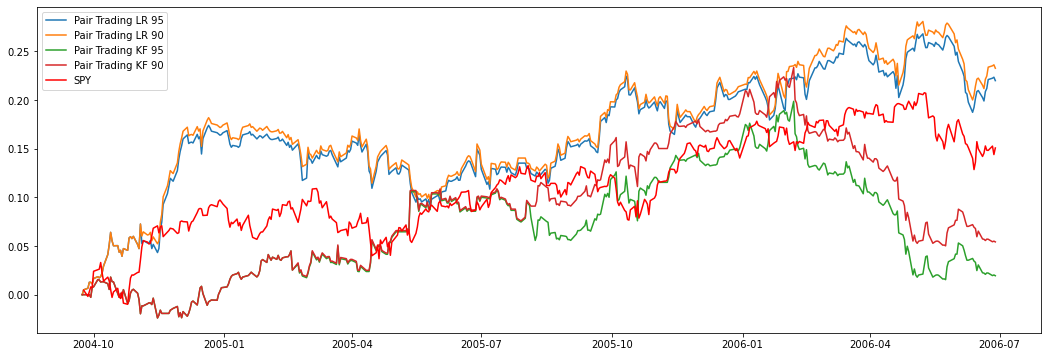

In [313]:
spy_cum_ret = low_vol_train_returns['SPY'].iloc[60:].cumsum()
plt.figure(figsize=(18,6))
plt.plot(low_vol_train_lr_95_confidence[low_vol_train_lr_95_best_parameter][1].cumsum(), label='Pair Trading LR 95')
plt.plot(low_vol_train_lr_90_confidence[low_vol_train_lr_90_best_parameter][1].cumsum(), label='Pair Trading LR 90')
plt.plot(low_vol_train_kf_95_confidence[low_vol_train_kf_95_best_parameter][1].cumsum(), label='Pair Trading KF 95')
plt.plot(low_vol_train_kf_90_confidence[low_vol_train_kf_90_best_parameter][1].cumsum(), label='Pair Trading KF 90')
plt.plot(spy_cum_ret, label='SPY', color='red')
plt.legend()

### Testing

In [257]:
# get historical data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,SPY,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU
Date,,,,,,,,,,,
2015-12-16,5.210416,4.301144,3.750526,3.822142,2.850400,4.168255,3.851677,3.643049,3.198227,3.689058,3.541824
2015-12-17,5.195060,4.284550,3.737567,3.797279,2.835976,4.157454,3.834980,3.622869,3.196941,3.673220,3.543896
2015-12-18,5.177084,4.268706,3.719690,3.779610,2.808879,4.142850,3.819618,3.609264,3.183848,3.653636,3.531388
2015-12-21,5.185300,4.273737,3.730976,3.780630,2.818701,4.151889,3.827319,3.618214,3.185494,3.663781,3.530683
2015-12-22,5.194333,4.281044,3.743918,3.792287,2.828008,4.158614,3.841033,3.630796,3.194662,3.671031,3.539122
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-12,5.513627,4.609444,3.901777,3.932372,3.121049,4.451024,4.149791,3.874221,3.373979,4.146421,3.906713
2018-12-13,5.513288,4.604459,3.907929,3.935524,3.113723,4.452002,4.147000,3.862495,3.380872,4.148084,3.915357
2018-12-14,5.494650,4.587695,3.890828,3.912440,3.103871,4.417748,4.133079,3.854732,3.379079,4.123305,3.913423


In [182]:
low_vol_testing_returns = (low_vol_testing_prices - low_vol_testing_prices.shift()).dropna()
low_vol_testing_returns

,SPY,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU
Date,,,,,,,,,,,
2015-12-17,-0.015355,-0.016594,-0.012959,-0.024862,-0.014424,-0.010800,-0.016697,-0.020180,-0.001286,-0.015839,0.002071
2015-12-18,-0.017976,-0.015844,-0.017877,-0.017669,-0.027097,-0.014604,-0.015363,-0.013605,-0.013094,-0.019584,-0.012507
2015-12-21,0.008215,0.005030,0.011286,0.001020,0.009822,0.009039,0.007701,0.008950,0.001646,0.010145,-0.000706
2015-12-22,0.009033,0.007307,0.012942,0.011656,0.009306,0.006725,0.013714,0.012582,0.009168,0.007251,0.008439
2015-12-23,0.012307,0.005096,0.007293,0.042581,0.011721,0.010695,0.011661,0.023342,0.009731,0.008355,0.015288
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-12,0.005023,0.010477,-0.001269,0.003955,0.005694,0.008517,0.005589,0.008636,-0.019065,0.007748,-0.006358
2018-12-13,-0.000339,-0.004985,0.006152,0.003153,-0.007326,0.000978,-0.002791,-0.011725,0.006893,0.001663,0.008644
2018-12-14,-0.018637,-0.016765,-0.017101,-0.023085,-0.009852,-0.034254,-0.013922,-0.007764,-0.001794,-0.024780,-0.001934


In [183]:
def calculate_returns(z_scores, betas, returns, parameters):
    open_short, open_long, close_short, close_long = parameters
    daily_positions = pd.DataFrame(index=z_scores.index, columns=z_scores.columns)
    for ticker in z_scores.columns:
        positions = pd.DataFrame(index=z_scores.index, columns=[ticker])
        cur_position = 0
        for t in z_scores.index:
            score = z_scores.loc[t][ticker]
            if score>open_short:
                positions.loc[t][ticker] = -1 # open short
                cur_position = -1
            elif score<open_long:
                positions.loc[t][ticker] = 1 # open long
                cur_position = 1
            elif score<close_short and cur_position==-1: 
                positions.loc[t][ticker] = 0 # close short
                cur_position = 0
            elif score>close_long and cur_position==1:
                positions.loc[t][ticker] = 0 # close long
                cur_position = 0
            elif score == math.isnan(score):
                positions.loc[t][ticker] = 0 # close current position
                cur_position = 0
            else:
                positions.loc[t][ticker] = cur_position # carry forward current position

        daily_positions[ticker] = positions
    
    weighted_positions = pd.DataFrame(index=daily_positions.index, columns=z_scores.columns)
    for t in daily_positions.index:
        positions = daily_positions.loc[t]
        positions[positions>0] /= sum(positions>0) # equal weights among long positions
        positions[positions<0] /= sum(positions<0) # equal weights among short positions
        weighted_positions.loc[t] = positions
    weighted_positions["SPY"] = -np.stack((betas*weighted_positions).sum(axis=1).values)
    
    ret = (returns * weighted_positions.shift()).sum(axis=1) / (abs(weighted_positions.shift()).sum(axis=1)/2)
    ret = ret.fillna(0)
    return ret.iloc[59:], weighted_positions

In [38]:
low_vol_testing_lr_z_scores_95_confidence, low_vol_testing_lr_betas = lr_strategy(0.05, low_vol_testing_returns,low_vol_trade_tickers)
low_vol_testing_lr_z_scores_90_confidence, low_vol_testing_lr_betas = lr_strategy(0.1, low_vol_testing_returns, low_vol_trade_tickers)
low_vol_testing_kf_z_scores_95_confidence, low_vol_testing_kf_betas = kf_strategy(0.05, low_vol_testing_returns, low_vol_trade_tickers)
low_vol_testing_kf_z_scores_90_confidence, low_vol_testing_kf_betas = kf_strategy(0.1, low_vol_testing_returns, low_vol_trade_tickers)

In [315]:
low_vol_testing_lr_95_returns, low_vol_testing_lr_95_positions = calculate_returns(low_vol_testing_lr_z_scores_95_confidence, low_vol_testing_lr_betas, low_vol_testing_returns, low_vol_train_lr_95_best_parameter)
low_vol_testing_lr_90_returns, low_vol_testing_lr_90_positions = calculate_returns(low_vol_testing_lr_z_scores_90_confidence, low_vol_testing_lr_betas, low_vol_testing_returns, low_vol_train_lr_90_best_parameter)
low_vol_testing_kf_95_returns, low_vol_testing_kf_95_positions = calculate_returns(low_vol_testing_kf_z_scores_95_confidence, low_vol_testing_kf_betas, low_vol_testing_returns, low_vol_train_kf_95_best_parameter)
low_vol_testing_kf_90_returns, low_vol_testing_kf_90_positions = calculate_returns(low_vol_testing_kf_z_scores_90_confidence, low_vol_testing_kf_betas, low_vol_testing_returns, low_vol_train_kf_90_best_parameter)

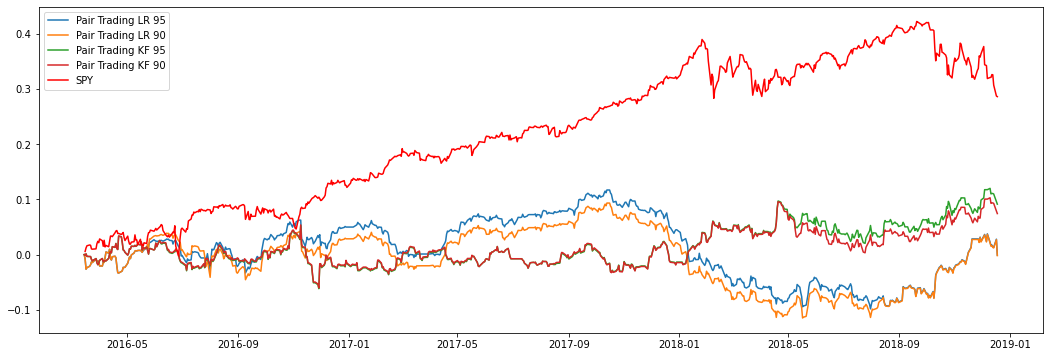

In [316]:
spy_cum_ret = low_vol_testing_returns['SPY'].iloc[60:].cumsum()
plt.figure(figsize=(18,6))
plt.plot(low_vol_testing_lr_95_returns.cumsum(), label='Pair Trading LR 95')
plt.plot(low_vol_testing_lr_90_returns.cumsum(), label='Pair Trading LR 90')
plt.plot(low_vol_testing_kf_95_returns.cumsum(), label='Pair Trading KF 95')
plt.plot(low_vol_testing_kf_90_returns.cumsum(), label='Pair Trading KF 90')
plt.plot(spy_cum_ret, label='SPY', color='red')
plt.legend()

In [276]:
ou_performance_metrics = pd.DataFrame(index=['SPY', 'Pair Trading LR 95', 'Pair Trading LR 90', 'Pair Trading KF 95', 'Pair Trading KF 90'], columns=['total_return', 'sharpe', 'max_drawdown', 'hit ratio'])
ou_performance_metrics.loc['SPY'] = [i for i in calculate_performance_metrics(low_vol_testing_returns['SPY'].iloc[60:])] + [None]
ou_performance_metrics.loc['Pair Trading LR 95'] = [i for i in calculate_performance_metrics(low_vol_testing_lr_95_returns[1:])] + [calculate_hit_ratio(low_vol_testing_lr_95_positions, low_vol_testing_prices, low_vol_trade_tickers)]
ou_performance_metrics.loc['Pair Trading LR 90'] = [i for i in calculate_performance_metrics(low_vol_testing_lr_90_returns[1:])] + [calculate_hit_ratio(low_vol_testing_lr_90_positions, low_vol_testing_prices, low_vol_trade_tickers)]
ou_performance_metrics.loc['Pair Trading KF 95'] = [i for i in calculate_performance_metrics(low_vol_testing_kf_95_returns[1:])] + [calculate_hit_ratio(low_vol_testing_kf_95_positions, low_vol_testing_prices, low_vol_trade_tickers)]
ou_performance_metrics.loc['Pair Trading KF 90'] = [i for i in calculate_performance_metrics(low_vol_testing_kf_90_returns[1:])] + [calculate_hit_ratio(low_vol_testing_kf_90_positions, low_vol_testing_prices, low_vol_trade_tickers)]
ou_performance_metrics

,total_return,sharpe,max_drawdown,hit ratio
SPY,0.285964,0.877552,0.136056,None
Pair Trading LR 95,-0.0008,-0.003005,0.215177,0.572139
Pair Trading LR 90,-0.001798,-0.006651,0.20805,0.576355
Pair Trading KF 95,0.09135,0.328705,0.114119,0.523132
Pair Trading KF 90,0.074269,0.266616,0.114119,0.522459


<AxesSubplot:>

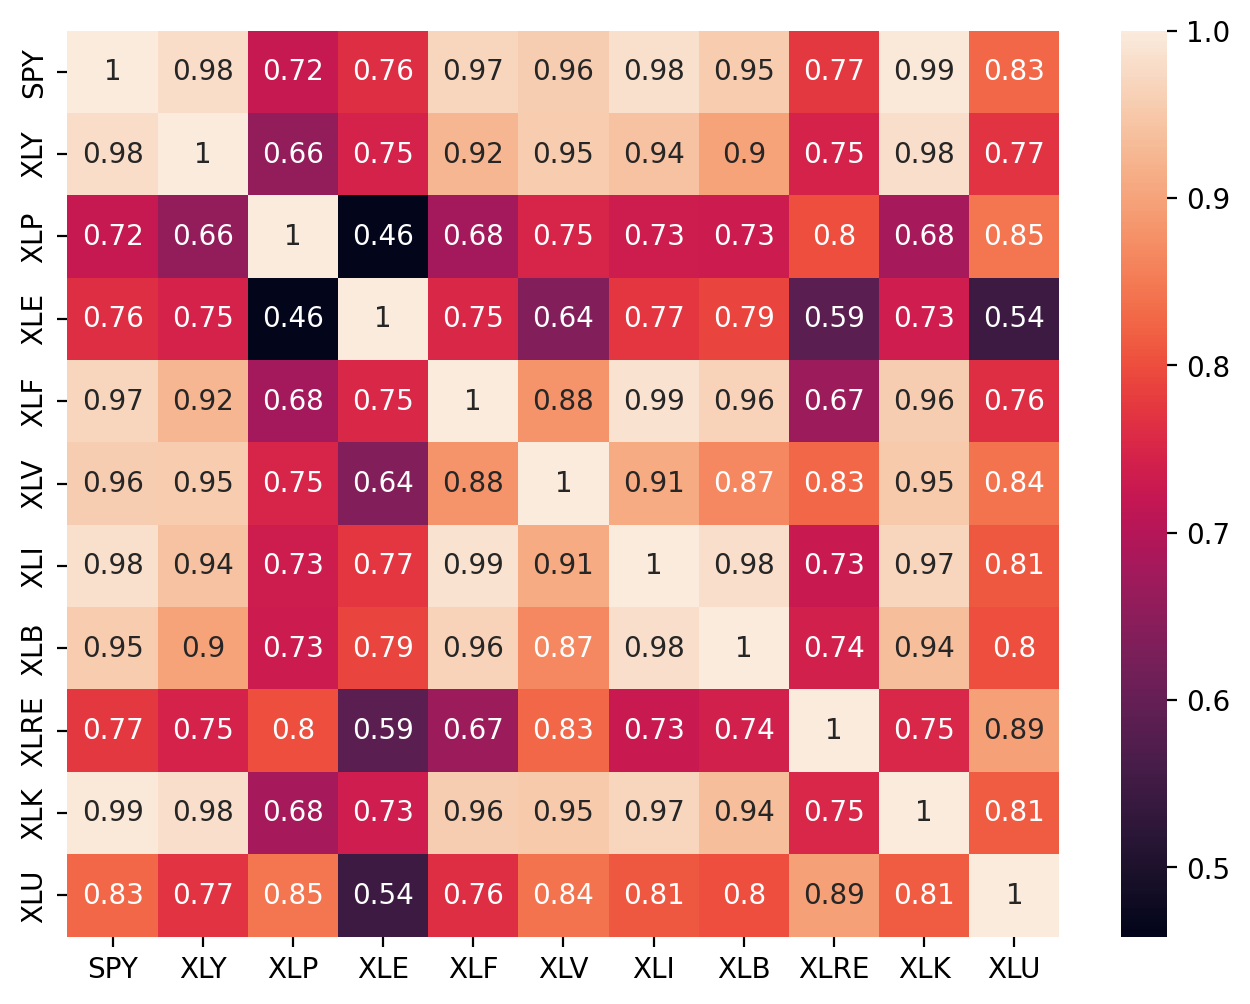

In [42]:
corr_matrix = low_vol_testing_prices.corr()
plt.figure(figsize=(8, 6), dpi=200)
sn.heatmap(corr_matrix, annot = True)

## Linear Regression

### Training

In [43]:
def cointegration_test(prices, tick1, tick2):
    return ts.coint(prices[tick1], prices[tick2])[1]

low_vol_allpairs = []
for i in range(len(low_vol_trade_tickers)):
    for j in range(i+1, len(low_vol_trade_tickers)):
        tick1, tick2 = low_vol_trade_tickers[i], low_vol_trade_tickers[j]
        p_value = cointegration_test(low_vol_train_prices, tick1, tick2)
        if p_value < 0.1:
            print(f"{tick1}, {tick2}, {p_value}")
            low_vol_allpairs.append((tick1, tick2))
low_vol_allpairs

XLP, XLE, 0.03385771213791347
XLP, XLU, 0.06493609554787129
XLV, XLU, 0.053748590983534884


[('XLP', 'XLE'), ('XLP', 'XLU'), ('XLV', 'XLU')]

In [44]:
def lr_spread_zscore(allpairs, prices):
    spread = pd.DataFrame(index=prices.index, columns=[f'{i[0]}&{i[1]}' for i in allpairs])

    for pair in allpairs:
        tik1 = pair[0]
        tik2 = pair[1]
        for t in prices.index[59:]:
            rolling_prices = prices.loc[:t]
            rolling_prices = rolling_prices.iloc[-60:]
            X = rolling_prices[[tik1]]
            y = rolling_prices[[tik2]]
            lr = LinearRegression().fit(X, y)
            intercept = lr.intercept_[0]
            hedge = lr.coef_[0][0]
            spread.loc[t, f'{tik1}&{tik2}'] = prices.loc[t, tik2] - hedge*prices.loc[t, tik1] - intercept
    spread = spread.dropna()
    for item in spread.columns:  
        spread[item] = (spread[item] - spread[item].rolling(window=60).mean())/spread[item].rolling(window=60).std()

    return spread.dropna()

In [45]:
low_vol_train_spread = lr_spread_zscore(low_vol_allpairs, low_vol_train_prices)

<AxesSubplot:xlabel='Date'>

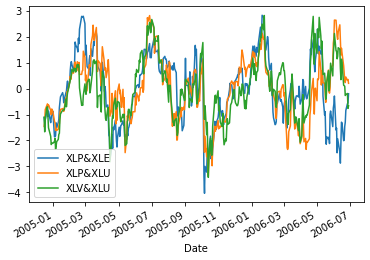

In [46]:
low_vol_train_spread.plot()

In [47]:
def lr_hyper_parameter_tuning(z_scores,
                              returns,
                              tik1,
                              tik2,
                              tik1_entry_threshold, 
                              tik1_exit_threshold ,
                              tik1_stoploss_threshold,
                              tik2_entry_threshold, 
                              tik2_exit_threshold,
                              tik2_stoploss_threshold):
    position = []
    cur_position = 0
    pair = f'{tik1}&{tik2}'
    for t in z_scores.index:
        z_score = z_scores.loc[t][pair]
        if z_score > tik1_entry_threshold and z_score < tik1_stoploss_threshold:
            cur_position = 1
        elif z_score < -tik2_entry_threshold and z_score > -tik2_stoploss_threshold:
            cur_position = -1
        elif z_score > tik1_stoploss_threshold:
            cur_position = 0
        elif z_score < -tik2_stoploss_threshold:
            cur_position = 0
        elif cur_position == 1 and z_score < tik1_exit_threshold:
            cur_position = 0
        elif cur_position == -1 and z_score > -tik2_exit_threshold:
            cur_position = 0
        position.append(cur_position)  
    positions = pd.DataFrame(index=z_scores.index)
    positions['signal'] = position
    positions['return'] = positions['signal'].shift() * returns[tik1] - positions['signal'].shift() * returns[tik2]
    return calculate_performance_metrics(positions['return'].dropna()), positions

In [48]:
def calculate_pair_hit_ratio(position):
    position['cum_return'] = position['return'].cumsum()
    enter_index = None
    num_trades = 0
    num_hits = 0
    for t in range(1, len(position.index)):
        if position.iloc[t]['signal'] != position.iloc[t-1]['signal']:
            if enter_index is None:
                enter_index = t
            else:
                num_trades += 1
                if position.iloc[t]['cum_return'] > position.iloc[enter_index]['cum_return']:
                    num_hits += 1
                if position.iloc[t]['signal'] != 0:
                    enter_index = t
                else:
                    enter_index = None
    return num_hits/num_trades

In [49]:
# tested with different parameters
entry_threshold = []
exit_threshold = []
stop_loss = []

In [50]:
low_vol_train_hyperparameters = {}
for pair in low_vol_allpairs:
    low_vol_train_hyperparameter = {}
    for tik1_entry_threshold in entry_threshold:
        for tik1_exit_threshold in exit_threshold:
            for tik1_stoploss_threshold in stop_loss:
                for tik2_entry_threshold in entry_threshold:
                    for tik2_exit_threshold in exit_threshold:
                        for tik2_stoploss_threshold in stop_loss:
                            low_vol_train_hyperparameter[(tik1_entry_threshold, tik1_exit_threshold, tik1_stoploss_threshold, tik2_entry_threshold, tik2_exit_threshold, tik2_stoploss_threshold)] = \
                                lr_hyper_parameter_tuning(low_vol_train_spread, low_vol_train_returns, pair[0], pair[1], tik1_entry_threshold, tik1_exit_threshold, tik1_stoploss_threshold, tik2_entry_threshold, tik2_exit_threshold, tik2_stoploss_threshold)
    low_vol_train_hyperparameters[pair] = low_vol_train_hyperparameter

In [318]:
def calc_best_parameter(hyperparameters, pair):
    returns_df = pd.DataFrame(columns=['parameters', 'total return', 'sharpe', 'max drawdown'])
    pair_returns = hyperparameters[pair]
    for key in pair_returns:
        performance = pair_returns[key][0]
        returns_df = returns_df.append({'parameters': key, 'total return': performance[0], 'sharpe': performance[1], 'max drawdown': -abs(performance[2])}, ignore_index=True)
    returns_df_zscore = returns_df[['total return', 'sharpe', 'max drawdown']].apply(zscore)
    returns_df_zscore['score'] = returns_df_zscore['sharpe'] + 2 * returns_df_zscore['max drawdown']
    return returns_df.loc[returns_df_zscore['score'].idxmax()]

In [10]:
# get low_vol_best_hyperparameters

In [320]:
# Calculate hit ratio
for pair in low_vol_allpairs:
    print(pair)
    print(calculate_pair_hit_ratio(low_vol_train_hyperparameters[pair][low_vol_best_hyperparameters[pair].parameters][1].copy()))

('XLP', 'XLE')
0.5882352941176471
('XLP', 'XLU')
0.5
('XLV', 'XLU')
0.46153846153846156


In [321]:
def portfolio_construction(allpairs, tickers, positions, returns, betas):
    daily_positions = pd.DataFrame(index=positions[0].index, columns=tickers)
    daily_positions = daily_positions.fillna(0)
    for i in range(len(allpairs)):
        pair = allpairs[i]
        position = positions[i]
        tick1, tick2 = pair
        daily_positions[tick1] = daily_positions[tick1] + position['signal']
        daily_positions[tick2] = daily_positions[tick2] - position['signal']
    
    weighted_positions = pd.DataFrame(index=daily_positions.index, columns=tickers)
    for t in daily_positions.index:
        position = daily_positions.loc[t]
        position[position>0] /= position[position>0].sum()
        position[position<0] /= abs(position[position<0].sum())
        weighted_positions.loc[t] = position
    weighted_positions["SPY"] = -np.stack((betas*weighted_positions).sum(axis=1).values)
    
    ret = (returns * weighted_positions.shift()).sum(axis=1) / (abs(weighted_positions.shift()).sum(axis=1)/2)
    ret = ret.fillna(0)
    return ret, weighted_positions

In [322]:
low_vol_training_positions = []
for pair in low_vol_allpairs:
    low_vol_training_positions.append(low_vol_train_hyperparameters[pair][low_vol_best_hyperparameters[pair].parameters][1])

low_vol_training_portfolio_returns, _ = portfolio_construction(low_vol_allpairs, low_vol_trade_tickers, low_vol_training_positions, low_vol_train_returns, low_vol_train_lr_betas[59:])

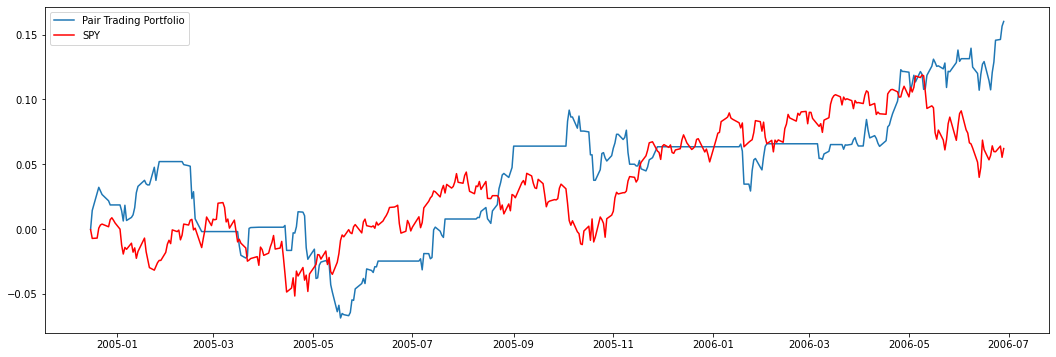

In [323]:
spy_cum_ret = low_vol_train_returns['SPY'].iloc[118:].cumsum()
plt.figure(figsize=(18,6))
plt.plot(low_vol_training_portfolio_returns.iloc[118:].cumsum(), label='Pair Trading Portfolio')
plt.plot(spy_cum_ret, label='SPY', color='red')
plt.legend()

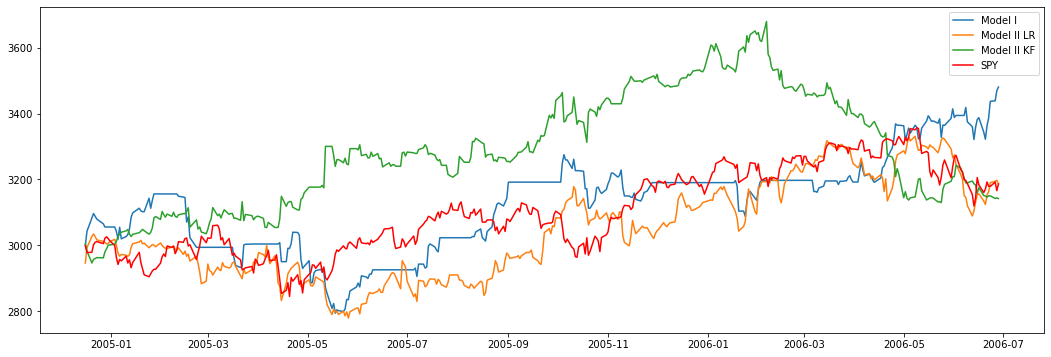

In [340]:
spy_cum_ret = low_vol_train_returns['SPY'].iloc[118:].cumsum()
plt.figure(figsize=(18,6))
plt.plot((1+low_vol_training_portfolio_returns.iloc[118:].cumsum()) * 3000, label='Model I')
plt.plot((1+low_vol_train_lr_90_confidence[low_vol_train_lr_90_best_parameter][1][59:].cumsum()) * 3000, label='Model II LR')
plt.plot((1+low_vol_train_kf_90_confidence[low_vol_train_kf_90_best_parameter][1][59:].cumsum()) * 3000, label='Model II KF')
plt.plot((1+spy_cum_ret) * 3000, label='SPY', color='red')
plt.legend()

### Testing

In [239]:
low_vol_testing_spread = lr_spread_zscore(low_vol_allpairs, low_vol_testing_prices)

In [330]:
low_vol_pairs_testing = {}
for pair in low_vol_allpairs:
    parameters = low_vol_best_hyperparameters[pair].parameters
    low_vol_pairs_testing[pair] = lr_hyper_parameter_tuning(low_vol_testing_spread, low_vol_testing_returns, pair[0], pair[1], parameters[0], parameters[1], parameters[2], parameters[3], parameters[4], parameters[5])

In [331]:
low_vol_testing_positions = []
for pair in low_vol_allpairs:
    low_vol_testing_positions.append(low_vol_pairs_testing[pair][1])

low_vol_testing_portfolio_returns, low_vol_testing_portfolio_weights = portfolio_construction(low_vol_allpairs, low_vol_trade_tickers, low_vol_testing_positions, low_vol_testing_returns, low_vol_testing_lr_betas[59:])

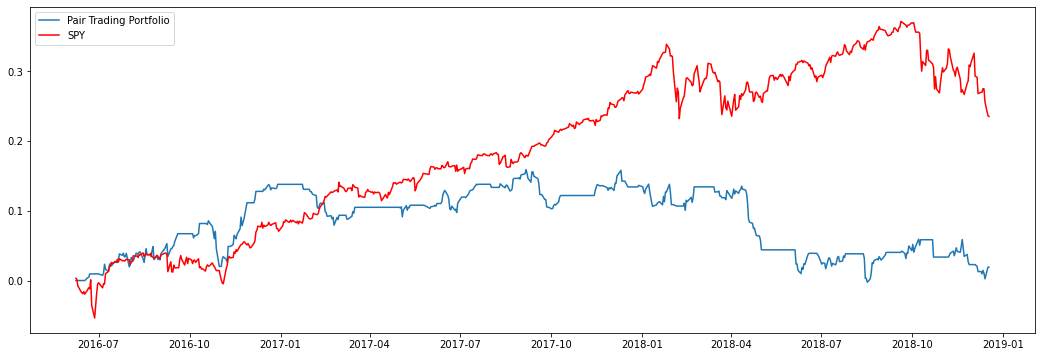

In [332]:
spy_cum_ret = low_vol_testing_returns['SPY'].iloc[118:].cumsum()
plt.figure(figsize=(18,6))
plt.plot(low_vol_testing_portfolio_returns.iloc[118:].cumsum(), label='Pair Trading Portfolio')
plt.plot(spy_cum_ret, label='SPY', color='red')
plt.legend()

In [333]:
lr_performance_metrics = pd.DataFrame(index=['SPY', 'Portfolio'] + [f'{pair[0]}&{pair[1]}' for pair in low_vol_allpairs], columns=['total_return', 'sharpe', 'max_drawdown', 'hit ratio'])
lr_performance_metrics.loc['SPY'] = [i for i in calculate_performance_metrics(low_vol_testing_returns['SPY'].iloc[118:])] + [None]
lr_performance_metrics.loc['Portfolio'] = [i for i in calculate_performance_metrics(low_vol_testing_portfolio_returns.iloc[118:])] + [None]
for pair in low_vol_allpairs:
    lr_performance_metrics.loc[f'{pair[0]}&{pair[1]}'] = [i for i in calculate_performance_metrics(low_vol_pairs_testing[pair][1]['return'].iloc[118:])] + [calculate_pair_hit_ratio(low_vol_pairs_testing[pair][1].copy())]
lr_performance_metrics

,total_return,sharpe,max_drawdown,hit ratio
SPY,0.234852,0.773878,0.136056,None
Portfolio,0.019175,0.082906,0.161334,None
XLP&XLE,0.018833,0.105309,0.086998,0.6
XLP&XLU,-0.117385,-0.88628,0.190596,0.47619
XLV&XLU,-0.014556,-0.084067,0.139896,0.516129


In [62]:
for i in range(len(low_vol_trade_tickers)):
    for j in range(i+1, len(low_vol_trade_tickers)):
        tick1, tick2 = low_vol_trade_tickers[i], low_vol_trade_tickers[j]
        p_value = cointegration_test(low_vol_testing_prices, tick1, tick2)
        if p_value < 0.1:
            print(f"{tick1}, {tick2}, {p_value}")

XLP, XLU, 0.09231807271755937
XLF, XLI, 0.018107080257493992
XLV, XLU, 0.05813462745310411


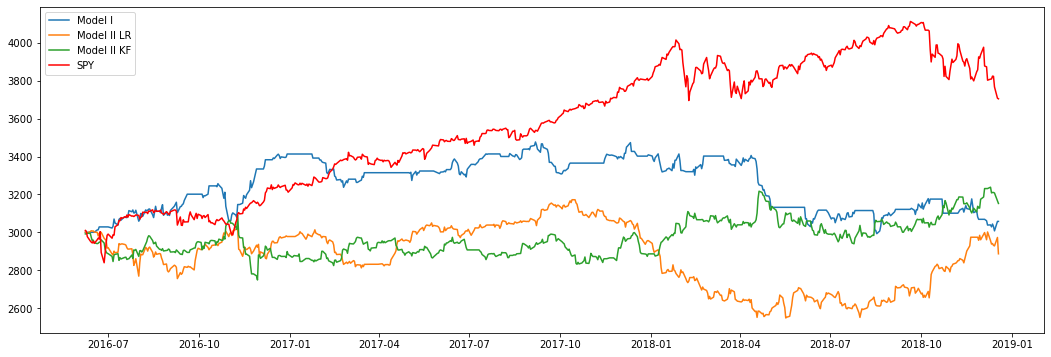

In [341]:
spy_cum_ret = low_vol_testing_returns['SPY'].iloc[118:].cumsum()
plt.figure(figsize=(18,6))
plt.plot((1+low_vol_testing_portfolio_returns.iloc[118:].cumsum()) * 3000, label='Model I')
plt.plot((1+low_vol_testing_lr_90_returns[59:].cumsum()) * 3000, label='Model II LR')
plt.plot((1+low_vol_testing_kf_90_returns[59:].cumsum()) * 3000, label='Model II KF')
plt.plot((1+spy_cum_ret) * 3000, label='SPY', color='red')
plt.legend()

In [384]:
performance_metrics = pd.DataFrame(index=['SPY', 'Model I Portfolio', 'Model II LR', 'Model II KF'] + [f'{pair[0]}&{pair[1]}' for pair in low_vol_allpairs], columns=['total_return', 'sharpe', 'max_drawdown', 'hit ratio'])
performance_metrics.loc['SPY'] = [i for i in calculate_performance_metrics(low_vol_testing_returns['SPY'].iloc[118:])] + [None]
performance_metrics.loc['Model I Portfolio'] = [i for i in calculate_performance_metrics(low_vol_testing_portfolio_returns.iloc[118:])] + [None]
performance_metrics.loc['Model II LR'] = [i for i in calculate_performance_metrics(low_vol_testing_lr_90_returns[59:])] + [calculate_hit_ratio(low_vol_testing_lr_90_positions, low_vol_testing_prices, low_vol_trade_tickers)]
performance_metrics.loc['Model II KF'] = [i for i in calculate_performance_metrics(low_vol_testing_kf_95_returns[59:])] + [calculate_hit_ratio(low_vol_testing_kf_95_positions, low_vol_testing_prices, low_vol_trade_tickers)]
for pair in low_vol_allpairs:
    performance_metrics.loc[f'{pair[0]}&{pair[1]}'] = [i for i in calculate_performance_metrics(low_vol_pairs_testing[pair][1]['return'].iloc[118:])] + [calculate_pair_hit_ratio(low_vol_pairs_testing[pair][1].copy())]
performance_metrics

,total_return,sharpe,max_drawdown,hit ratio
SPY,0.23,0.77,0.14,None
Model I Portfolio,0.02,0.08,0.16,None
Model II LR,-0.04,-0.15,0.21,0.58
Model II KF,0.07,0.27,0.11,0.52
XLP&XLE,0.02,0.11,0.09,0.6
XLP&XLU,-0.12,-0.89,0.19,0.48
XLV&XLU,-0.01,-0.08,0.14,0.52


# High Volatility: train 2000-06-28->2003-06-24, test 2007-09-18->2009-06-01

## OU Process

### Training

In [63]:
# Get historical data from Yahoo API

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- XLC: Data doesn't exist for startDate = 962164800, endDate = 1056427200
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 962164800, endDate = 1056427200
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  

,SPY,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLK,XLU
Date,,,,,,,,,,
2000-06-28,4.567453,2.981877,2.679776,2.859483,2.535722,3.032825,2.948449,2.512110,3.722702,2.555063
2000-06-29,4.557962,2.964741,2.688576,2.861517,2.535080,3.047782,2.930895,2.493662,3.702899,2.538956
2000-06-30,4.565519,2.975790,2.699158,2.848218,2.510388,3.050958,2.932554,2.468523,3.722702,2.515159
2000-07-03,4.579192,2.989132,2.701013,2.854378,2.528641,3.048842,2.945726,2.495986,3.729599,2.544540
2000-07-05,4.560992,3.001108,2.703483,2.812040,2.539563,3.055178,2.936964,2.500620,3.696999,2.553408
...,...,...,...,...,...,...,...,...,...,...
2003-06-17,4.246514,3.091011,2.540884,2.691551,2.645049,3.105485,2.778034,2.644254,2.595148,2.434508
2003-06-18,4.245628,3.081716,2.539430,2.685455,2.635368,3.102885,2.772895,2.634031,2.604816,2.439355
2003-06-19,4.230251,3.065054,2.528207,2.690740,2.611346,3.081173,2.754259,2.629350,2.597432,2.442428


In [64]:
high_vol_train_returns = (high_vol_train_prices - high_vol_train_prices.shift()).dropna()
high_vol_train_returns

,SPY,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLK,XLU
Date,,,,,,,,,,
2000-06-29,-0.009491,-0.017136,0.008799,0.002034,-0.000642,0.014957,-0.017554,-0.018448,-0.019803,-0.016107
2000-06-30,0.007557,0.011049,0.010582,-0.013299,-0.024692,0.003176,0.001659,-0.025138,0.019803,-0.023797
2000-07-03,0.013673,0.013342,0.001855,0.006160,0.018253,-0.002116,0.013173,0.027463,0.006896,0.029381
2000-07-05,-0.018200,0.011976,0.002470,-0.042337,0.010922,0.006336,-0.008762,0.004633,-0.032599,0.008869
2000-07-06,0.007748,0.007118,0.001232,0.010093,0.007638,-0.002107,-0.002754,-0.026543,0.015268,0.001103
...,...,...,...,...,...,...,...,...,...,...
2003-06-17,0.000000,0.000000,-0.006279,-0.009677,-0.000385,0.019666,0.000427,0.003705,0.004582,-0.004847
2003-06-18,-0.000885,-0.009295,-0.001455,-0.006096,-0.009681,-0.002600,-0.005139,-0.010223,0.009667,0.004847
2003-06-19,-0.015378,-0.016661,-0.011222,0.005285,-0.024022,-0.021711,-0.018636,-0.004682,-0.007384,0.003073


<AxesSubplot:>

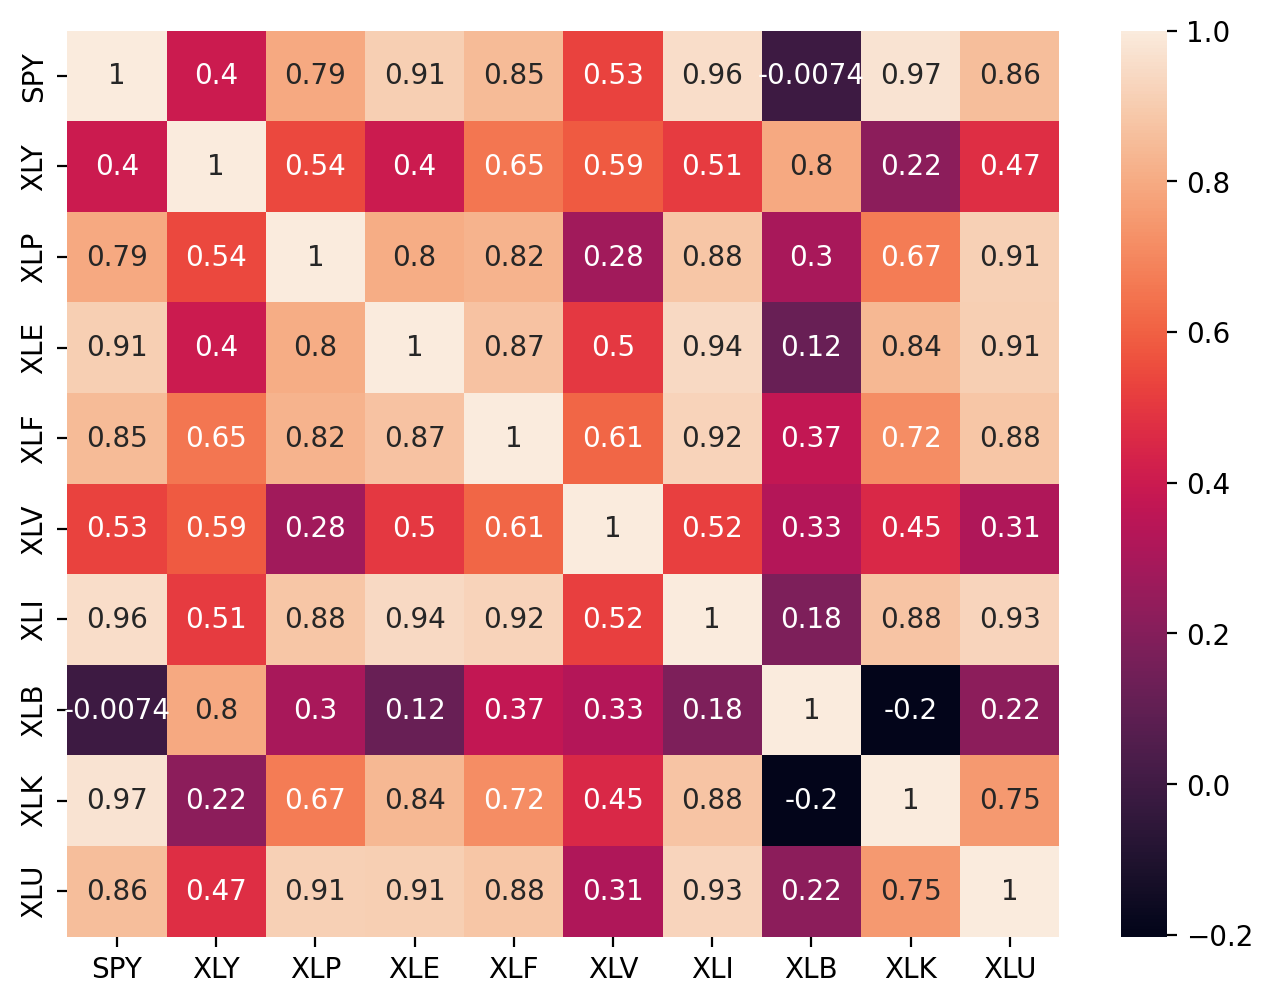

In [65]:
corr_matrix = high_vol_train_prices.corr()
plt.figure(figsize=(8, 6), dpi=200)
sn.heatmap(corr_matrix, annot = True)

In [66]:
high_vol_trade_tickers = ['XLP', 'XLE', 'XLF', 'XLI', 'XLK', 'XLU']

In [67]:
high_vol_train_lr_z_scores_95_confidence, high_vol_train_lr_betas = lr_strategy(0.05, high_vol_train_returns, high_vol_trade_tickers)
high_vol_train_lr_z_scores_90_confidence, high_vol_train_lr_betas = lr_strategy(0.1, high_vol_train_returns, high_vol_trade_tickers)

In [68]:
high_vol_train_kf_z_scores_95_confidence, high_vol_train_kf_betas = kf_strategy(0.05, high_vol_train_returns, high_vol_trade_tickers)
high_vol_train_kf_z_scores_90_confidence, high_vol_train_kf_betas = kf_strategy(0.1, high_vol_train_returns, high_vol_trade_tickers)

<AxesSubplot:xlabel='Date'>

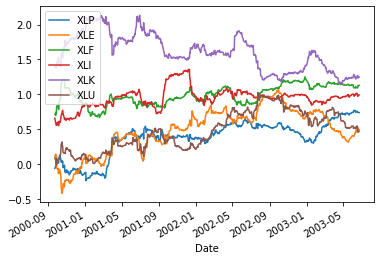

In [69]:
high_vol_train_lr_betas.plot()

<AxesSubplot:xlabel='Date'>

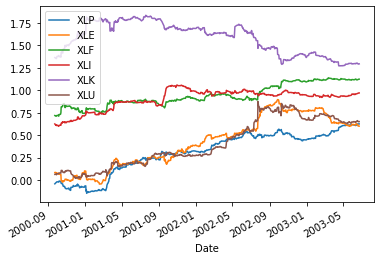

In [70]:
high_vol_train_kf_betas.plot()

In [71]:
high_vol_train_lr_95_confidence = {}
for open_short in open_shorts:
    for open_long in open_longs:
        for close_short in close_shorts:
            for close_long in close_longs:
                high_vol_train_lr_95_confidence[(open_short, open_long, close_short, close_long)] = ou_hyper_parameter_tuning(high_vol_train_lr_z_scores_95_confidence, high_vol_train_lr_betas, high_vol_train_returns, open_short, open_long, close_short, close_long)

# use same pattern to get 
high_vol_train_lr_90_confidence
high_vol_train_kf_95_confidence
high_vol_train_kf_90_confidence


In [2]:
high_vol_train_lr_95_confidence_df = pd.DataFrame(columns=['parameters', 'total return', 'sharpe', 'max drawdown'])
# get the optimal parameters for the OU_LR strategy by looking for the max z-score under 95 condidence level

In [352]:
# calculate hit ratio
high_vol_train_lr_95_best_parameter = high_vol_train_lr_95_confidence_df.loc[high_vol_train_lr_95_confidence_df_zscore['score'].idxmax()].parameters
calculate_hit_ratio(high_vol_train_lr_95_confidence[high_vol_train_lr_95_best_parameter][2], high_vol_train_prices, high_vol_trade_tickers)

0.6210526315789474

In [3]:
high_vol_train_lr_90_confidence_df = pd.DataFrame(columns=['parameters', 'total return', 'sharpe', 'max drawdown'])
# get the optimal parameters for the OU_LR strategy by looking for the max z-score under 90 condidence level

In [354]:
# calculate hit ratio
high_vol_train_lr_90_best_parameter = high_vol_train_lr_90_confidence_df.loc[high_vol_train_lr_90_confidence_df_zscore['score'].idxmax()].parameters
calculate_hit_ratio(high_vol_train_lr_90_confidence[high_vol_train_lr_90_best_parameter][2], high_vol_train_prices, high_vol_trade_tickers)

0.625

In [4]:
high_vol_train_kf_95_confidence_df = pd.DataFrame(columns=['parameters', 'total return', 'sharpe', 'max drawdown'])
# get the optimal parameters for the OU_KR strategy by looking for the max z-score under 95 condidence level

In [356]:
# calculate hit ratio
high_vol_train_kf_95_best_parameter = high_vol_train_kf_95_confidence_df.loc[high_vol_train_kf_95_confidence_df_zscore['score'].idxmax()].parameters
calculate_hit_ratio(high_vol_train_kf_95_confidence[high_vol_train_kf_95_best_parameter][2], high_vol_train_prices, high_vol_trade_tickers)

0.5036319612590799

In [5]:
high_vol_train_kf_90_confidence_df = pd.DataFrame(columns=['parameters', 'total return', 'sharpe', 'max drawdown'])
# get the optimal parameters for the OU_KR strategy by looking for the max z-score under 90 condidence level

In [358]:
# calculate hit ratio
high_vol_train_kf_90_best_parameter = high_vol_train_kf_90_confidence_df.loc[high_vol_train_kf_90_confidence_df_zscore['score'].idxmax()].parameters
calculate_hit_ratio(high_vol_train_kf_90_confidence[high_vol_train_kf_90_best_parameter][2], high_vol_train_prices, high_vol_trade_tickers)

0.5024154589371981

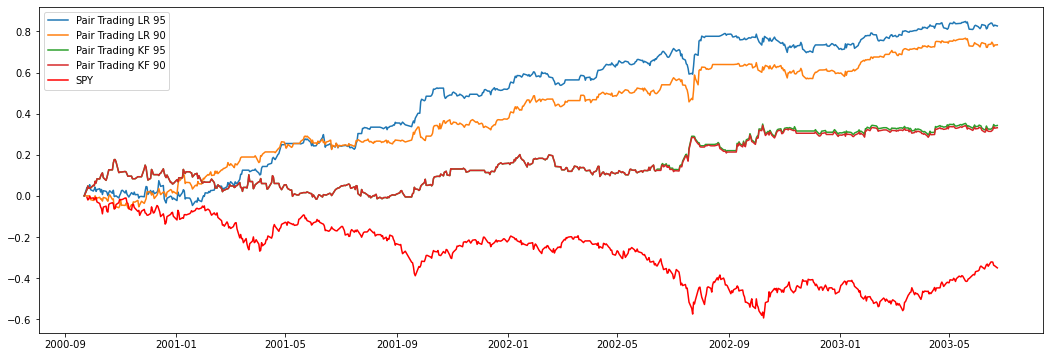

In [359]:
spy_cum_ret = high_vol_train_returns['SPY'].iloc[window_size:].cumsum()
plt.figure(figsize=(18,6))
plt.plot(high_vol_train_lr_95_confidence[high_vol_train_lr_95_best_parameter][1].cumsum(), label='Pair Trading LR 95')
plt.plot(high_vol_train_lr_90_confidence[high_vol_train_lr_90_best_parameter][1].cumsum(), label='Pair Trading LR 90')
plt.plot(high_vol_train_kf_95_confidence[high_vol_train_kf_95_best_parameter][1].cumsum(), label='Pair Trading KF 95')
plt.plot(high_vol_train_kf_90_confidence[high_vol_train_kf_90_best_parameter][1].cumsum(), label='Pair Trading KF 90')
plt.plot(spy_cum_ret, label='SPY', color='red')
plt.legend()

### Testing

In [229]:
# Get historical data from Yahoo API

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- XLC: Data doesn't exist for startDate = 1190088000, endDate = 1243828800
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- XLRE: Data doesn't exist for startDate = 1190088000, endDate = 1243828800
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]

,SPY,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLK,XLU
Date,,,,,,,,,,
2007-09-18,4.726968,3.422430,2.915448,3.862308,3.037014,3.297851,3.389369,3.382203,3.047141,3.158456
2007-09-19,4.732854,3.424278,2.916168,3.870954,3.043293,3.301809,3.399938,3.393519,3.050926,3.169466
2007-09-20,4.725787,3.404296,2.917248,3.870292,3.030984,3.300679,3.391590,3.390402,3.054697,3.155747
2007-09-21,4.728482,3.404646,2.917754,3.876227,3.034894,3.305572,3.398357,3.393292,3.062323,3.157335
2007-09-24,4.726638,3.396256,2.917031,3.874376,3.020923,3.303596,3.388712,3.394495,3.059700,3.161049
...,...,...,...,...,...,...,...,...,...,...
2009-05-22,4.229869,2.936616,2.766192,3.454883,2.007469,2.997416,2.809299,2.976698,2.628098,2.766542
2009-05-26,4.255159,2.969720,2.778760,3.475850,2.039539,3.006469,2.845074,3.000371,2.653741,2.795164
2009-05-27,4.237145,2.947627,2.753022,3.464913,2.009183,2.996229,2.812061,2.962144,2.643911,2.774639


In [230]:
high_vol_testing_returns = (high_vol_testing_prices - high_vol_testing_prices.shift()).dropna()
high_vol_testing_returns

,SPY,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLK,XLU
Date,,,,,,,,,,
2007-09-19,0.005886,0.001848,0.000720,0.008646,0.006279,0.003958,0.010569,0.011316,0.003785,0.011010
2007-09-20,-0.007067,-0.019982,0.001080,-0.000662,-0.012309,-0.001130,-0.008347,-0.003117,0.003771,-0.013719
2007-09-21,0.002695,0.000350,0.000506,0.005936,0.003910,0.004892,0.006766,0.002890,0.007626,0.001588
2007-09-24,-0.001844,-0.008391,-0.000723,-0.001851,-0.013970,-0.001976,-0.009645,0.001203,-0.002623,0.003714
2007-09-25,-0.001980,-0.013133,-0.001449,-0.016547,-0.002053,-0.003398,0.003968,-0.003370,0.010081,0.001235
...,...,...,...,...,...,...,...,...,...,...
2009-05-22,-0.002132,0.010685,0.006124,0.000412,-0.006838,0.001187,-0.003681,-0.003795,0.003548,0.008164
2009-05-26,0.025290,0.033104,0.012568,0.020968,0.032070,0.009053,0.035774,0.023672,0.025643,0.028622
2009-05-27,-0.018014,-0.022093,-0.025738,-0.010938,-0.030357,-0.010240,-0.033012,-0.038226,-0.009830,-0.020525


In [86]:
high_vol_testing_lr_z_scores_95_confidence, high_vol_testing_lr_betas = lr_strategy(0.05, high_vol_testing_returns,high_vol_trade_tickers)
high_vol_testing_lr_z_scores_90_confidence, high_vol_testing_lr_betas = lr_strategy(0.1, high_vol_testing_returns, high_vol_trade_tickers)
high_vol_testing_kf_z_scores_95_confidence, high_vol_testing_kf_betas = kf_strategy(0.05, high_vol_testing_returns, high_vol_trade_tickers)
high_vol_testing_kf_z_scores_90_confidence, high_vol_testing_kf_betas = kf_strategy(0.1, high_vol_testing_returns, high_vol_trade_tickers)

In [360]:
high_vol_testing_lr_95_returns, high_vol_testing_lr_95_positions = calculate_returns(high_vol_testing_lr_z_scores_95_confidence, high_vol_testing_lr_betas, high_vol_testing_returns, high_vol_train_lr_95_best_parameter)
high_vol_testing_lr_90_returns, high_vol_testing_lr_90_positions = calculate_returns(high_vol_testing_lr_z_scores_90_confidence, high_vol_testing_lr_betas, high_vol_testing_returns, high_vol_train_lr_90_best_parameter)
high_vol_testing_kf_95_returns, high_vol_testing_kf_95_positions = calculate_returns(high_vol_testing_kf_z_scores_95_confidence, high_vol_testing_kf_betas, high_vol_testing_returns, high_vol_train_kf_95_best_parameter)
high_vol_testing_kf_90_returns, high_vol_testing_kf_90_positions = calculate_returns(high_vol_testing_kf_z_scores_90_confidence, high_vol_testing_kf_betas, high_vol_testing_returns, high_vol_train_kf_90_best_parameter)

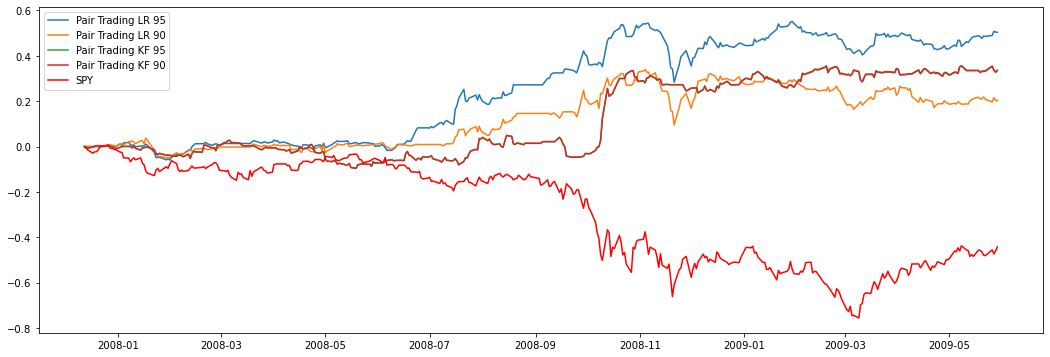

In [361]:
# window_size is a parameter ranging from 1-200
spy_cum_ret = high_vol_testing_returns['SPY'].iloc[window_size:].cumsum()
plt.figure(figsize=(18,6))
plt.plot(high_vol_testing_lr_95_returns.cumsum(), label='Pair Trading LR 95')
plt.plot(high_vol_testing_lr_90_returns.cumsum(), label='Pair Trading LR 90')
plt.plot(high_vol_testing_kf_95_returns.cumsum(), label='Pair Trading KF 95')
plt.plot(high_vol_testing_kf_90_returns.cumsum(), label='Pair Trading KF 90')
plt.plot(spy_cum_ret, label='SPY', color='red')
plt.legend()

In [89]:
ou_performance_metrics = pd.DataFrame(index=['SPY', 'Pair Trading LR 95', 'Pair Trading LR 90', 'Pair Trading KF 95', 'Pair Trading KF 90'], columns=['total_return', 'sharpe', 'max_drawdown', 'hit ratio'])
ou_performance_metrics.loc['SPY'] = [i for i in calculate_performance_metrics(high_vol_testing_returns['SPY'].iloc[window_size:])] + [None]
ou_performance_metrics.loc['Pair Trading LR 95'] = [i for i in calculate_performance_metrics(high_vol_testing_lr_95_returns[1:])] + [calculate_hit_ratio(high_vol_testing_lr_95_positions, high_vol_testing_prices, high_vol_trade_tickers)]
ou_performance_metrics.loc['Pair Trading LR 90'] = [i for i in calculate_performance_metrics(high_vol_testing_lr_90_returns[1:])] + [calculate_hit_ratio(high_vol_testing_lr_90_positions, high_vol_testing_prices, high_vol_trade_tickers)]
ou_performance_metrics.loc['Pair Trading KF 95'] = [i for i in calculate_performance_metrics(high_vol_testing_kf_95_returns[1:])] + [calculate_hit_ratio(high_vol_testing_kf_95_positions, high_vol_testing_prices, high_vol_trade_tickers)]
ou_performance_metrics.loc['Pair Trading KF 90'] = [i for i in calculate_performance_metrics(high_vol_testing_kf_90_returns[1:])] + [calculate_hit_ratio(high_vol_testing_kf_90_positions, high_vol_testing_prices, high_vol_trade_tickers)]
ou_performance_metrics

,total_return,sharpe,max_drawdown,hit ratio
SPY,-0.442684,-0.775375,0.762722,None
Pair Trading LR 95,0.499023,1.336118,0.273844,0.574627
Pair Trading LR 90,0.5128,1.372198,0.273844,0.574627
Pair Trading KF 95,0.33677,1.005219,0.123667,0.553299
Pair Trading KF 90,0.381717,1.15543,0.119539,0.572864


<AxesSubplot:>

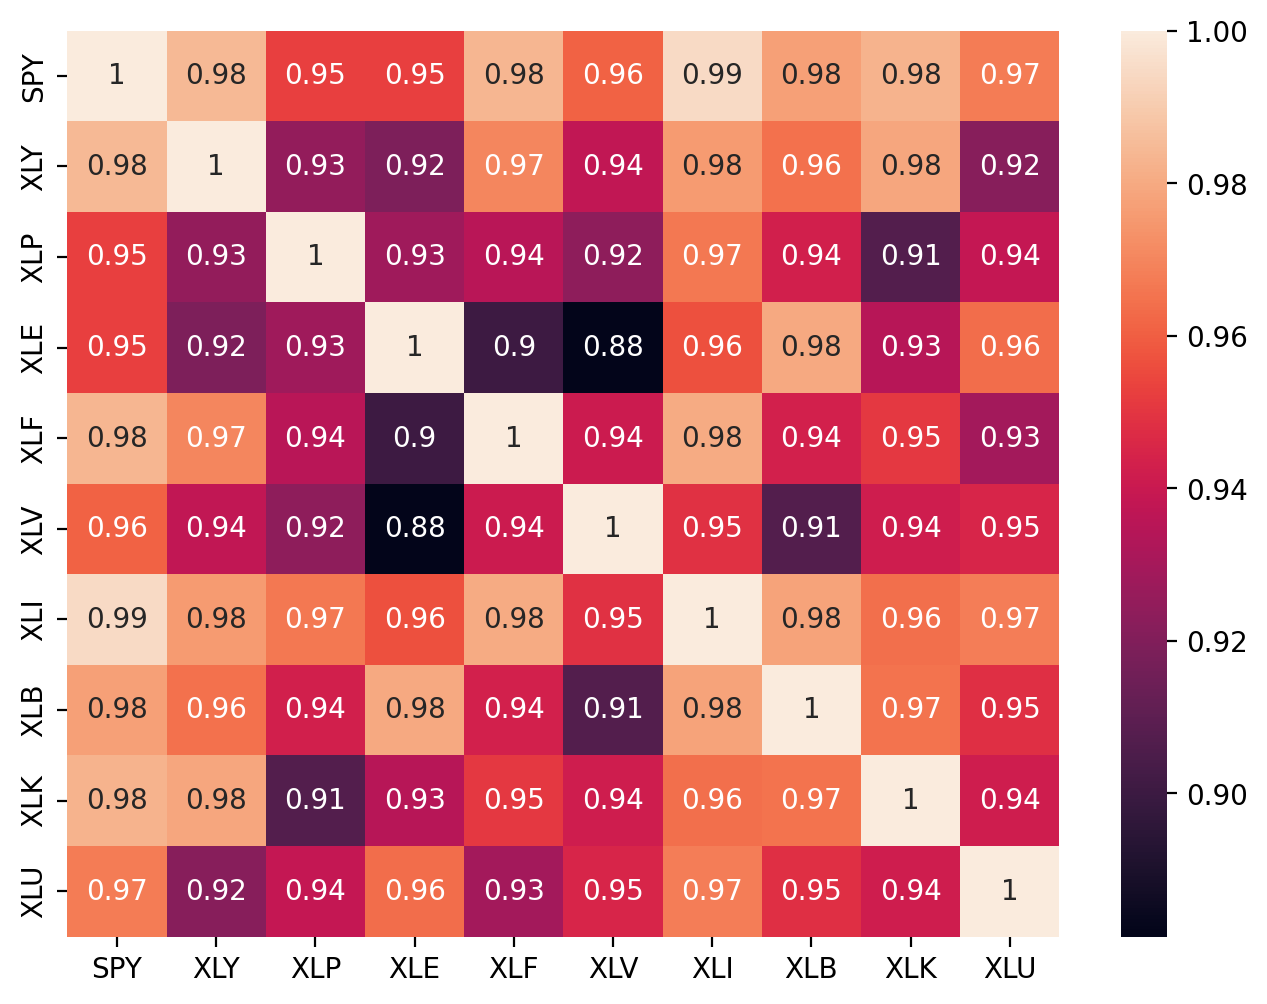

In [90]:
corr_matrix = high_vol_testing_prices.corr()
plt.figure(figsize=(8, 6), dpi=200)
sn.heatmap(corr_matrix, annot = True)

## Linear Regression

### Training

In [91]:
high_vol_allpairs = []
high_vol_allpairs
# Get pairs using cointegration test

XLP, XLF, 0.08535121410508689
XLE, XLF, 0.00035073967590162994
XLE, XLI, 0.012777123887395762
XLE, XLU, 0.0125036781983532
XLF, XLI, 9.766550527198622e-05
XLF, XLK, 0.017791109927660358
XLF, XLU, 0.00042103318761784446
XLI, XLU, 0.04157636399222418
XLK, XLU, 0.09354830795846675


[('XLP', 'XLF'),
 ('XLE', 'XLF'),
 ('XLE', 'XLI'),
 ('XLE', 'XLU'),
 ('XLF', 'XLI'),
 ('XLF', 'XLK'),
 ('XLF', 'XLU'),
 ('XLI', 'XLU'),
 ('XLK', 'XLU')]

In [92]:
high_vol_train_spread = lr_spread_zscore(high_vol_allpairs, high_vol_train_prices)

<AxesSubplot:xlabel='Date'>

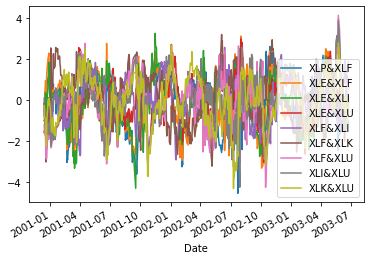

In [93]:
high_vol_train_spread.plot()

In [94]:
high_vol_train_hyperparameters = {}
for pair in high_vol_allpairs:
    high_vol_train_hyperparameter = {}
    for tik1_entry_threshold in entry_threshold:
        for tik1_exit_threshold in exit_threshold:
            for tik1_stoploss_threshold in stop_loss:
                for tik2_entry_threshold in entry_threshold:
                    for tik2_exit_threshold in exit_threshold:
                        for tik2_stoploss_threshold in stop_loss:
                            high_vol_train_hyperparameter[(tik1_entry_threshold, tik1_exit_threshold, tik1_stoploss_threshold, tik2_entry_threshold, tik2_exit_threshold, tik2_stoploss_threshold)] = \
                                lr_hyper_parameter_tuning(high_vol_train_spread, high_vol_train_returns, pair[0], pair[1], tik1_entry_threshold, tik1_exit_threshold, tik1_stoploss_threshold, tik2_entry_threshold, tik2_exit_threshold, tik2_stoploss_threshold)
    high_vol_train_hyperparameters[pair] = high_vol_train_hyperparameter

In [362]:
high_vol_best_hyperparameters = {}
for pair in high_vol_allpairs:
    high_vol_best_hyperparameters[pair] = calc_best_parameter(high_vol_train_hyperparameters, pair)
high_vol_best_hyperparameters

{('XLP',
  'XLF'): parameters      (1.75, 0.75, 2.5, 1, 0.25, 2)
 total return                         0.116121
 sharpe                               0.336314
 max drawdown                        -0.128023
 Name: 994, dtype: object,
 ('XLE',
  'XLF'): parameters      (1.75, 0.5, 2.5, 1.75, 0, 2.5)
 total return                          0.061438
 sharpe                                0.146937
 max drawdown                         -0.165801
 Name: 953, dtype: object,
 ('XLE',
  'XLI'): parameters      (1.5, 0.75, 2, 1.25, 0.75, 2.5)
 total return                            0.23092
 sharpe                                 0.583178
 max drawdown                          -0.142405
 Name: 719, dtype: object,
 ('XLE',
  'XLU'): parameters      (1.75, 0, 2.5, 1.25, 0.75, 2)
 total return                         0.509279
 sharpe                               1.323824
 max drawdown                        -0.085072
 Name: 814, dtype: object,
 ('XLF',
  'XLI'): parameters      (1.75, 0, 2, 1.75, 0,

In [363]:
for pair in high_vol_allpairs:
    print(pair)
    print(calculate_pair_hit_ratio(high_vol_train_hyperparameters[pair][high_vol_best_hyperparameters[pair].parameters][1].copy()))

('XLP', 'XLF')
0.5
('XLE', 'XLF')
0.4782608695652174
('XLE', 'XLI')
0.6046511627906976
('XLE', 'XLU')
0.6842105263157895
('XLF', 'XLI')
0.5555555555555556
('XLF', 'XLK')
0.5869565217391305
('XLF', 'XLU')
0.6086956521739131
('XLI', 'XLU')
0.6904761904761905
('XLK', 'XLU')
0.4482758620689655


In [364]:
high_vol_training_positions = []
for pair in high_vol_allpairs:
    high_vol_training_positions.append(high_vol_train_hyperparameters[pair][high_vol_best_hyperparameters[pair].parameters][1])

high_vol_training_portfolio_returns, _ = portfolio_construction(high_vol_allpairs, high_vol_trade_tickers, high_vol_training_positions, high_vol_train_returns, high_vol_train_lr_betas[59:])

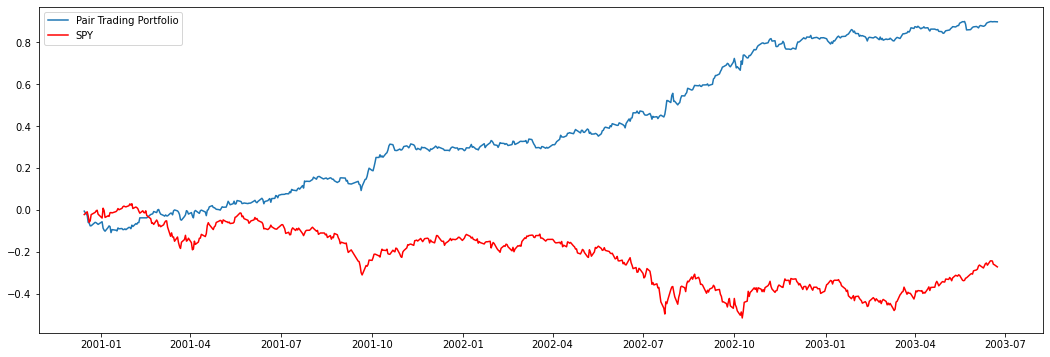

In [365]:
spy_cum_ret = high_vol_train_returns['SPY'].iloc[118:].cumsum()
plt.figure(figsize=(18,6))
plt.plot(high_vol_training_portfolio_returns.iloc[118:].cumsum(), label='Pair Trading Portfolio')
plt.plot(spy_cum_ret, label='SPY', color='red')
plt.legend()

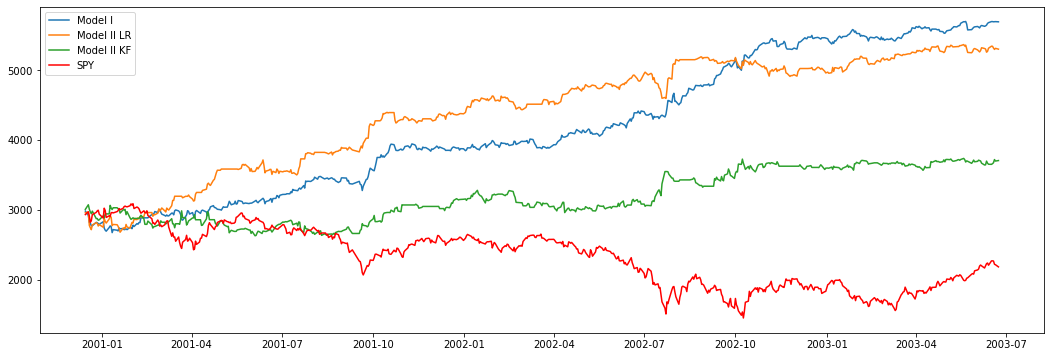

In [377]:
spy_cum_ret = high_vol_train_returns['SPY'].iloc[118:].cumsum()
plt.figure(figsize=(18,6))
plt.plot((1+high_vol_training_portfolio_returns.iloc[118:].cumsum()) * 3000, label='Model I')
plt.plot((1+high_vol_train_lr_95_confidence[high_vol_train_lr_95_best_parameter][1][window_size-1:].cumsum()) * 3000, label='Model II LR')
plt.plot((1+high_vol_train_kf_95_confidence[high_vol_train_kf_95_best_parameter][1][window_size-1:].cumsum()) * 3000, label='Model II KF')
plt.plot((1+spy_cum_ret) * 3000, label='SPY', color='red')
plt.legend()

### Testing

In [99]:
high_vol_testing_spread = lr_spread_zscore(high_vol_allpairs, high_vol_testing_prices)

In [366]:
high_vol_pairs_testing = {}
for pair in high_vol_allpairs:
    parameters = high_vol_best_hyperparameters[pair].parameters
    high_vol_pairs_testing[pair] = lr_hyper_parameter_tuning(high_vol_testing_spread, high_vol_testing_returns, pair[0], pair[1], parameters[0], parameters[1], parameters[2], parameters[3], parameters[4], parameters[5])

In [367]:
high_vol_testing_positions = []
for pair in high_vol_allpairs:
    high_vol_testing_positions.append(high_vol_pairs_testing[pair][1])

high_vol_testing_portfolio_returns, _ = portfolio_construction(high_vol_allpairs, high_vol_trade_tickers, high_vol_testing_positions, high_vol_testing_returns, high_vol_testing_lr_betas[window_size-1:])

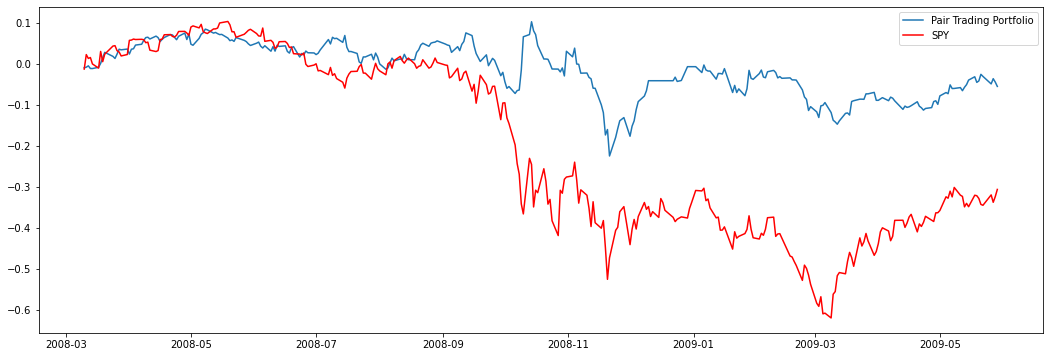

In [368]:
spy_cum_ret = high_vol_testing_returns['SPY'].iloc[118:].cumsum()
plt.figure(figsize=(18,6))
plt.plot(high_vol_testing_portfolio_returns.iloc[118:].cumsum(), label='Pair Trading Portfolio')
plt.plot(spy_cum_ret, label='SPY', color='red')
plt.legend()

In [369]:
lr_performance_metrics = pd.DataFrame(index=['SPY', 'Portfolio'] + [f'{pair[0]}&{pair[1]}' for pair in high_vol_allpairs], columns=['total_return', 'sharpe', 'max_drawdown', 'hit ratio'])
lr_performance_metrics.loc['SPY'] = [i for i in calculate_performance_metrics(high_vol_testing_returns['SPY'].iloc[118:])] + [None]
lr_performance_metrics.loc['Portfolio'] = [i for i in calculate_performance_metrics(high_vol_testing_portfolio_returns.iloc[118:])] + [None]
for pair in high_vol_allpairs:
    lr_performance_metrics.loc[f'{pair[0]}&{pair[1]}'] = [i for i in calculate_performance_metrics(high_vol_pairs_testing[pair][1]['return'].iloc[118:])] + [calculate_pair_hit_ratio(high_vol_pairs_testing[pair][1].copy())]
lr_performance_metrics

,total_return,sharpe,max_drawdown,hit ratio
SPY,-0.306852,-0.596594,0.723224,None
Portfolio,-0.055585,-0.182471,0.327434,None
XLP&XLF,0.459404,1.291503,0.337185,0.64
XLE&XLF,-0.053901,-0.16299,0.28638,0.538462
XLE&XLI,0.269521,2.06715,0.06363,0.55
XLE&XLU,0.284782,1.953142,0.12129,0.764706
XLF&XLI,0.09066,0.414099,0.180557,0.333333
XLF&XLK,0.247714,0.698892,0.360984,0.555556
XLF&XLU,0.011813,0.028833,0.50155,0.357143
XLI&XLU,-0.167629,-0.887295,0.269693,0.333333


In [370]:
for i in range(len(high_vol_trade_tickers)):
    for j in range(i+1, len(high_vol_trade_tickers)):
        tick1, tick2 = high_vol_trade_tickers[i], high_vol_trade_tickers[j]
        p_value = cointegration_test(high_vol_testing_prices, tick1, tick2)
        if p_value < 0.2:
            print(f"{tick1}, {tick2}, {p_value}")

XLP, XLF, 0.11149523267891287
XLP, XLI, 0.030837263736850487
XLI, XLU, 0.14237133525838475


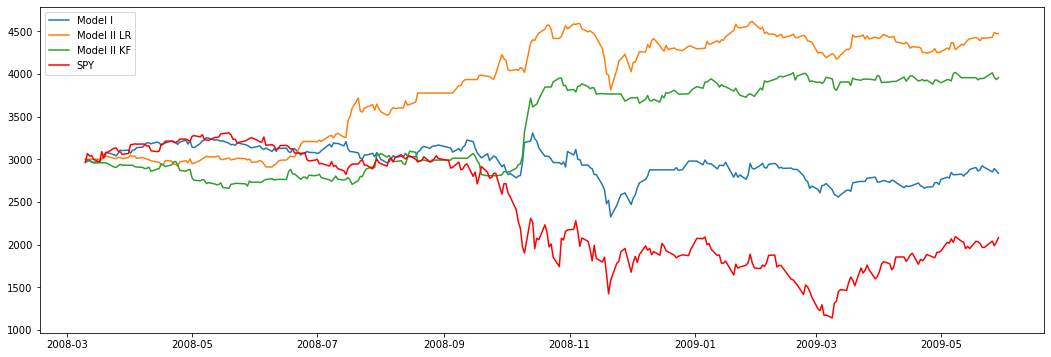

In [378]:
spy_cum_ret = high_vol_testing_returns['SPY'].iloc[118:].cumsum()
plt.figure(figsize=(18,6))
plt.plot((1+high_vol_testing_portfolio_returns.iloc[118:].cumsum()) * 3000, label='Model I')
plt.plot((1+high_vol_testing_lr_95_returns[window_size-1:].cumsum()) * 3000, label='Model II LR')
plt.plot((1+high_vol_testing_kf_95_returns[window_size-1:].cumsum()) * 3000, label='Model II KF')
plt.plot((1+spy_cum_ret) * 3000, label='SPY', color='red')
plt.legend()

In [383]:
# get performance_metrics for all pairs

,total_return,sharpe,max_drawdown,hit ratio
SPY,-0.31,-0.6,0.72,None
Model I Portfolio,-0.06,-0.18,0.33,None
Model II LR,0.49,1.45,0.26,0.54
Model II KF,0.32,1.07,0.11,0.55
XLP&XLF,0.46,1.29,0.34,0.64
XLE&XLF,-0.05,-0.16,0.29,0.54
XLE&XLI,0.27,2.07,0.06,0.55
XLE&XLU,0.28,1.95,0.12,0.76
XLF&XLI,0.09,0.41,0.18,0.33
XLF&XLK,0.25,0.7,0.36,0.56
